In [1]:
import pandas as pd
import re

In [2]:
f = open("whatsapp_chat.txt","r",encoding="utf-8")

In [3]:
data = f.read()

In [4]:
print(data)

11/02/2025, 08:45 - Aisha: Good morning Ma'am 😊
11/02/2025, 08:46 - Ms. Sharma: Good morning Aisha. Please remember the assignment due tomorrow.
11/02/2025, 08:47 - Rohit: Ma'am, can you confirm the word count for the essay?
11/02/2025, 08:48 - Ms. Sharma: The essay should be 800–1000 words. Focus on structure and sources.
11/02/2025, 08:50 - Aisha: Thanks — can we use Wikipedia as a source?
11/02/2025, 08:52 - Ms. Sharma: Wikipedia can be a starting point but cite primary sources. Prefer books, journals, or reputable websites.
11/02/2025, 09:10 - Aisha: Understood. Also, will there be extra credit for late submissions?
11/02/2025, 09:12 - Ms. Sharma: No extra credit. Late submissions will have a penalty of 10% per day unless there's a valid reason.
11/03/2025, 10:05 - Rohit: Ma'am, I am struggling with the citation format. Which one should we use — APA or MLA?
11/03/2025, 10:06 - Ms. Sharma: Use APA 7th edition for this assignment. I'll upload a sample on the class drive.
11/03/2025, 

In [5]:
pattern = "\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s"

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_5756\4142607342.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern = "\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s"


In [6]:
message=re.split(pattern,data)[1:]
len(message)

47

In [7]:
dates = re.findall(pattern,data)
dates

['11/02/2025, 08:45 - ',
 '11/02/2025, 08:46 - ',
 '11/02/2025, 08:47 - ',
 '11/02/2025, 08:48 - ',
 '11/02/2025, 08:50 - ',
 '11/02/2025, 08:52 - ',
 '11/02/2025, 09:10 - ',
 '11/02/2025, 09:12 - ',
 '11/03/2025, 10:05 - ',
 '11/03/2025, 10:06 - ',
 '11/03/2025, 10:07 - ',
 '11/04/2025, 14:20 - ',
 '11/04/2025, 14:22 - ',
 '11/04/2025, 14:23 - ',
 '11/06/2025, 18:00 - ',
 '11/06/2025, 18:02 - ',
 '11/07/2025, 16:35 - ',
 '11/07/2025, 16:37 - ',
 '11/08/2025, 09:01 - ',
 '11/08/2025, 09:03 - ',
 '11/08/2025, 12:00 - ',
 '11/08/2025, 12:05 - ',
 '11/09/2025, 19:20 - ',
 '11/09/2025, 19:45 - ',
 '11/10/2025, 11:30 - ',
 '11/10/2025, 11:35 - ',
 '11/10/2025, 11:36 - ',
 '11/10/2025, 11:37 - ',
 '11/10/2025, 11:40 - ',
 '11/10/2025, 11:42 - ',
 '11/10/2025, 15:20 - ',
 '11/10/2025, 15:25 - ',
 '11/10/2025, 20:00 - ',
 '11/10/2025, 20:05 - ',
 '11/11/2025, 07:15 - ',
 '11/11/2025, 07:16 - ',
 '11/11/2025, 07:18 - ',
 '11/11/2025, 07:20 - ',
 '11/11/2025, 08:00 - ',
 '11/11/2025, 08:01 - ',


In [8]:
df = pd.DataFrame({"user_message":message,"message_date":dates})
df["message_date"] = pd.to_datetime(df["message_date"],format="%d/%m/%Y, %H:%M - ")  # convert message_date type to datetime
df.rename(columns={"message_date":"date"},inplace=True)
df.head()

,user_message,date
0,Aisha: Good morning Ma'am 😊\n,2025-02-11 08:45:00
1,Ms. Sharma: Good morning Aisha. Please remembe...,2025-02-11 08:46:00
2,"Rohit: Ma'am, can you confirm the word count f...",2025-02-11 08:47:00
3,Ms. Sharma: The essay should be 800–1000 words...,2025-02-11 08:48:00
4,Aisha: Thanks — can we use Wikipedia as a sour...,2025-02-11 08:50:00


In [9]:
df.shape

(47, 2)

In [10]:
# separate users and messages
users = []
messages = []

for message in df["user_message"]:
    entry = re.split(r"([\w\W]+?):\s",message)
    if entry [1:]:# usser name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append("group_notification")
        messages.append(entry[0])

df["users"] = users
df["messages"] = messages
df.drop(columns=["user_message"],inplace=True)

df.head()

,date,users,messages
0,2025-02-11 08:45:00,Aisha,Good morning Ma'am 😊\n
1,2025-02-11 08:46:00,Ms. Sharma,Good morning Aisha. Please remember the assign...
2,2025-02-11 08:47:00,Rohit,"Ma'am, can you confirm the word count for the ..."
3,2025-02-11 08:48:00,Ms. Sharma,The essay should be 800–1000 words. Focus on s...
4,2025-02-11 08:50:00,Aisha,Thanks — can we use Wikipedia as a source?\n


In [24]:
df["year"] = df["date"].dt.year

In [26]:
df.head()

,date,users,messages,year
0,2025-02-11 08:45:00,Aisha,Good morning Ma'am 😊\n,2025
1,2025-02-11 08:46:00,Ms. Sharma,Good morning Aisha. Please remember the assign...,2025
2,2025-02-11 08:47:00,Rohit,"Ma'am, can you confirm the word count for the ...",2025
3,2025-02-11 08:48:00,Ms. Sharma,The essay should be 800–1000 words. Focus on s...,2025
4,2025-02-11 08:50:00,Aisha,Thanks — can we use Wikipedia as a source?\n,2025


In [30]:
df["month"] = df["date"].dt.month_name()

In [32]:
df["day"] = df["date"].dt.day

In [36]:
df["hours"] = df["date"].dt.hour

In [40]:
df["minute"] = df["date"].dt.minute

In [42]:
df.head()

,date,users,messages,year,month,day,hours,minute
0,2025-02-11 08:45:00,Aisha,Good morning Ma'am 😊\n,2025,February,11,8,45
1,2025-02-11 08:46:00,Ms. Sharma,Good morning Aisha. Please remember the assign...,2025,February,11,8,46
2,2025-02-11 08:47:00,Rohit,"Ma'am, can you confirm the word count for the ...",2025,February,11,8,47
3,2025-02-11 08:48:00,Ms. Sharma,The essay should be 800–1000 words. Focus on s...,2025,February,11,8,48
4,2025-02-11 08:50:00,Aisha,Thanks — can we use Wikipedia as a source?\n,2025,February,11,8,50


In [78]:
df[df["users"] == "Ms. Sharma"].shape

(21, 8)

In [66]:
words = []
for message in df["messages"]:
    words.extend(message.split())

In [68]:
len(words)

449

In [70]:
df[df["messages"] == "<Media Omited>\n"].shape[0]

0

In [72]:
df[df["messages"].str.contains("Media omitted", na=False)].head()

,date,users,messages,year,month,day,hours,minute
22,2025-09-11 19:20:00,Aisha,"Ma'am, I've attached my draft. Please review w...",2025,September,11,19,20


In [84]:
!pip install urlextract

In [88]:
from urlextract import URLExtract 

extractor = URLExtract()
urls = extractor.find_urls("Lets www.gmail.com have URL stackoverflow.com")
urls

['www.gmail.com', 'stackoverflow.com']

In [96]:
links = []
for message in df["messages"]:
    links.extend(extractor.find_urls(message))

In [98]:
len(links)

0

In [100]:
df

,date,users,messages,year,month,day,hours,minute
0,2025-02-11 08:45:00,Aisha,Good morning Ma'am 😊\n,2025,February,11,8,45
1,2025-02-11 08:46:00,Ms. Sharma,Good morning Aisha. Please remember the assign...,2025,February,11,8,46
2,2025-02-11 08:47:00,Rohit,"Ma'am, can you confirm the word count for the ...",2025,February,11,8,47
3,2025-02-11 08:48:00,Ms. Sharma,The essay should be 800–1000 words. Focus on s...,2025,February,11,8,48
4,2025-02-11 08:50:00,Aisha,Thanks — can we use Wikipedia as a source?\n,2025,February,11,8,50
5,2025-02-11 08:52:00,Ms. Sharma,Wikipedia can be a starting point but cite pri...,2025,February,11,8,52
6,2025-02-11 09:10:00,Aisha,"Understood. Also, will there be extra credit f...",2025,February,11,9,10
7,2025-02-11 09:12:00,Ms. Sharma,No extra credit. Late submissions will have a ...,2025,February,11,9,12
8,2025-03-11 10:05:00,Rohit,"Ma'am, I am struggling with the citation forma...",2025,March,11,10,5
9,2025-03-11 10:06:00,Ms. Sharma,Use APA 7th edition for this assignment. I'll ...,2025,March,11,10,6


In [114]:
x = df["users"].value_counts().head(3)

In [106]:
import matplotlib.pyplot as plt 

In [118]:
name = x.index
count = x.values

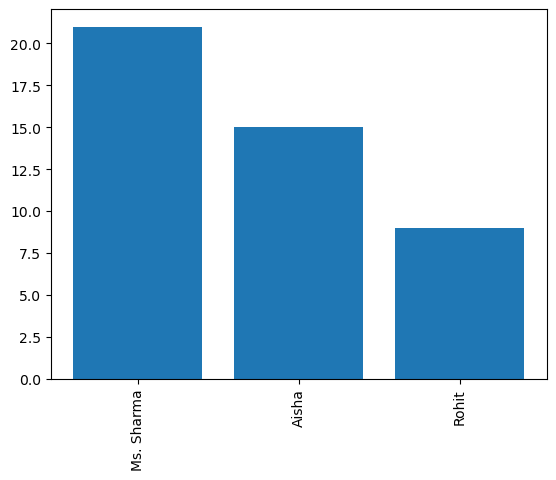

In [124]:
plt.bar(name,count)
plt.xticks(rotation = "vertical")
plt.show()

In [140]:
round((df["users"].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={"users":"name","count":"percent"})

,name,percent
0,Ms. Sharma,44.68
1,Aisha,31.91
2,Rohit,19.15
3,Parent Megha,4.26


In [192]:
words = []

for message in temp["messages"]:
    words.extend(message.lower().split())
    

In [194]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(10))

,0,1
0,the,22
1,"ma'am,",12
2,—,10
3,a,10
4,can,7
5,for,7
6,be,7
7,will,7
8,i,6
9,you,5


In [180]:
temp = df[df["users"] != "group notification"]
temp = temp[temp["messages"] != "<Media omitted>"]

In [204]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [208]:
words = []

for message in temp["messages"]:
    for word in str(message).lower().split():
        if word not in stop_words:
            words.append(word)

In [212]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(10))

,0,1
0,"ma'am,",12
1,—,10
2,good,4
3,please,4
4,morning,3
5,word,3
6,use,3
7,class,3
8,test,3
9,calculators,3


In [230]:
temp = temp[~temp["messages"].str.contains("media omitted", case=False, na=False)]

In [244]:
import emoji

In [248]:
emojis = []
for message in df["messages"]:
    emojis.extend([c for  c in  message if c in emoji.EMOJI_DATA])

In [316]:
emoji_count = Counter(emojis)
pd.DataFrame(emoji_count.most_common(5))

,0,1
0,😊,1
1,😅,1


In [256]:
df["month_num"] = df["date"].dt.month

In [266]:
timeline = df.groupby(["year","month_num","month"]).count()["messages"].reset_index()

In [268]:
timeline

,year,month_num,month,messages
0,2025,2,February,8
1,2025,3,March,3
2,2025,4,April,3
3,2025,6,June,2
4,2025,7,July,2
5,2025,8,August,4
6,2025,9,September,2
7,2025,10,October,10
8,2025,11,November,13


In [274]:
time = []
for i in range (timeline.shape[0]):
    time.append(timeline["month"][i] + "-" + str(timeline["year"][i]) )

In [278]:
timeline["time"] = time

In [280]:
timeline

,year,month_num,month,messages,time
0,2025,2,February,8,February-2025
1,2025,3,March,3,March-2025
2,2025,4,April,3,April-2025
3,2025,6,June,2,June-2025
4,2025,7,July,2,July-2025
5,2025,8,August,4,August-2025
6,2025,9,September,2,September-2025
7,2025,10,October,10,October-2025
8,2025,11,November,13,November-2025


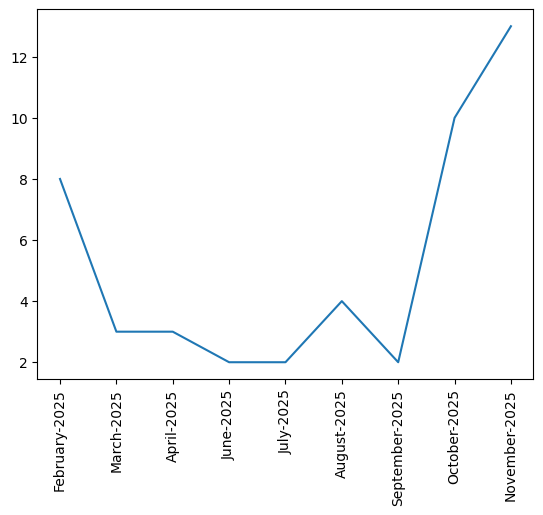

In [288]:
plt.plot(timeline["time"],timeline["messages"])
plt.xticks(rotation= "vertical")
plt.show()

In [290]:
df["only_date"] = df["date"].dt.date

In [298]:
daily_timeline = df.groupby("only_date").count()["messages"].reset_index()

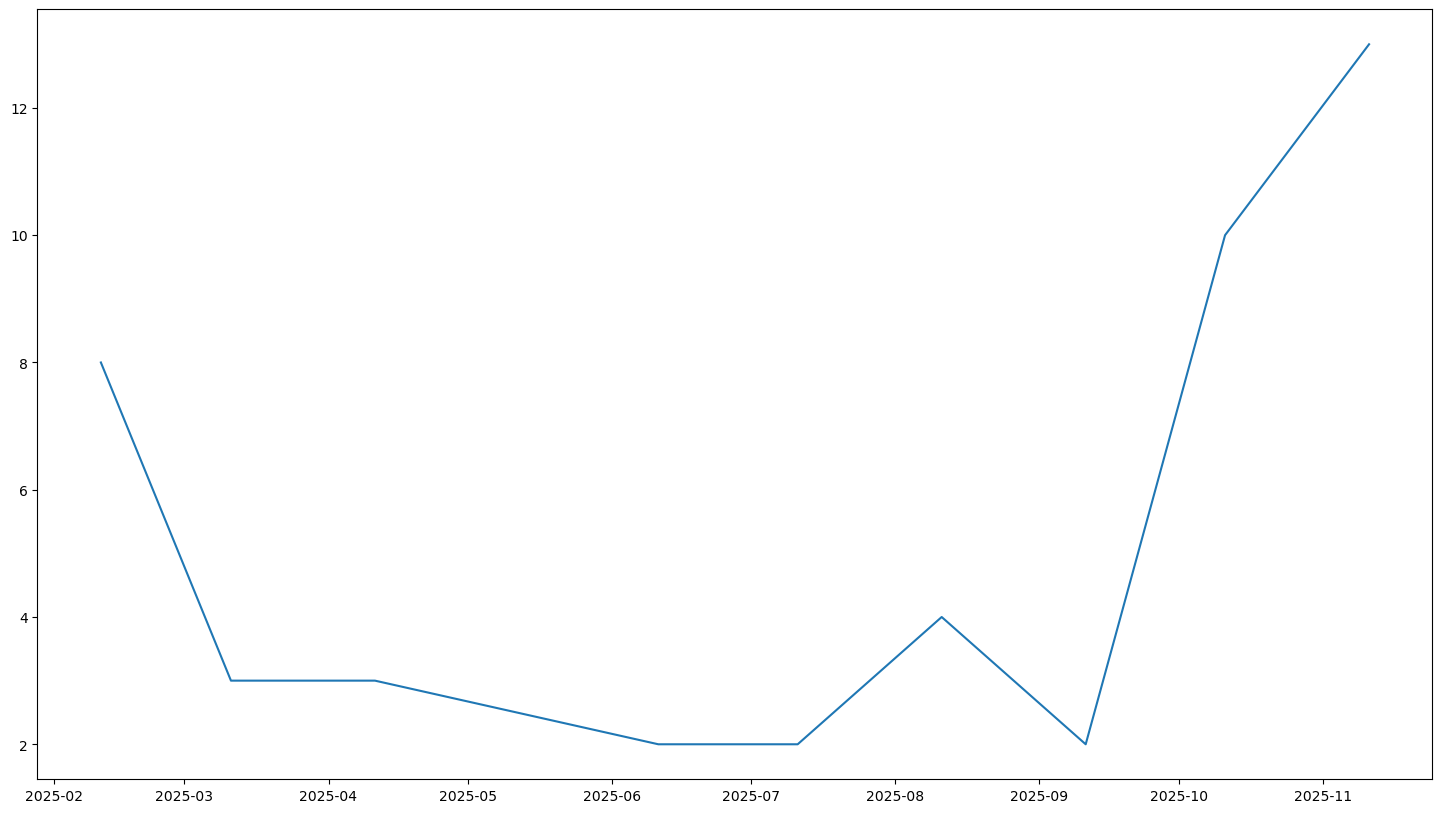

In [302]:
plt.figure(figsize= (18,10))
plt.plot(daily_timeline["only_date"],daily_timeline["messages"])


In [304]:
df["day_name"] = df["date"].dt.day_name()

In [306]:
df["day_name"].value_counts()

day_name
Tuesday      24
Saturday     10
Friday        5
Monday        4
Wednesday     2
Thursday      2
Name: count, dtype: int64

In [330]:
period = []
for hour in df[["day_name","hours"]]["hours"]:
    if hour == 23:
        period.append(str(hour) + "-" + str("00"))
    elif hour == 0:
        period.append(str("00") + "-"+ str(hour+1))
    else:
        period.append(str("00") + "-" + str(hour+1))

In [332]:
df["period"] = period

In [334]:
df.sample(5)

,date,users,messages,year,month,day,hours,minute,month_num,only_date,day_name,period
30,2025-10-11 15:20:00,Aisha,Can you share past papers please?\n,2025,October,11,15,20,10,2025-10-11,Saturday,00-16
2,2025-02-11 08:47:00,Rohit,"Ma'am, can you confirm the word count for the ...",2025,February,11,8,47,2,2025-02-11,Tuesday,00-9
36,2025-11-11 07:18:00,Rohit,"Ma'am, will calculators be allowed?\n",2025,November,11,7,18,11,2025-11-11,Tuesday,00-8
15,2025-06-11 18:02:00,Ms. Sharma,Sure — I'll be available from 4:30 PM to 5:30 ...,2025,June,11,18,2,6,2025-06-11,Wednesday,00-19
27,2025-10-11 11:37:00,Ms. Sharma,"Mix of both — 40% MCQs, 60% short & long answe...",2025,October,11,11,37,10,2025-10-11,Saturday,00-12


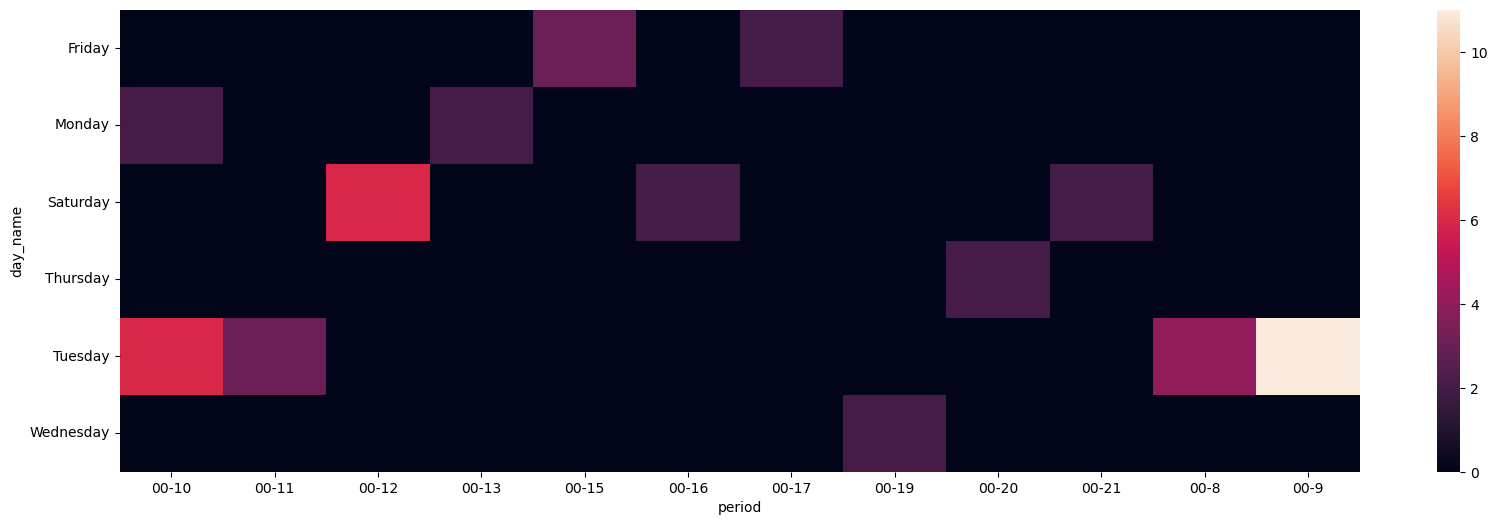

In [338]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index="day_name",columns="period",values="messages",aggfunc="count").fillna(0))
plt.yticks(rotation="horizontal")
plt.show()

In [340]:
df.pivot_table(index="day_name",columns="period",values="messages",aggfunc="count").fillna(0)

period,00-10,00-11,00-12,00-13,00-15,00-16,00-17,00-19,00-20,00-21,00-8,00-9
day_name,,,,,,,,,,,,
Friday,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Monday,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,0.0,0.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0
Thursday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Tuesday,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0
Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
